<a href="https://colab.research.google.com/github/GerardoToso/Competencia-FSadosky-e-YPF-/blob/main/01_Analisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="float:left; border:none">
   <tr style="border:none">
       <td style="border:none">  
           <img 
               src="" 
               style="width:10px"
           >
           </a>    
       </td>
   </tr>
</table>
<div style="float:right;"><h2>01. Análisis exploratorio de datos</h2></div>

 <a id="top"></a> <br>
## Índice
1. [Presentación del problema](#1)<br>
2. [Carga de paquetes y datos](#2)<br>
    2.1. [Importación de librerias](#21)<br>
    2.2. [Lectura de datos](#22)<br>
3. [Analisis exploratorio de datos](#3)<br>
    3.1. [Primer aproximamiento a los datos](#31)<br>
    3.2. [Analisis de valores nulos](#32)<br>
    3.3. [Variable delta_WHP](#33)<br>
    3.4. [Variable WHP_i](#34)<br>
    3.5. [](#35)<br>
    3.6. [](#36)<br>
    3.7. [](#37)<br>
    3.8. [](#38)<br>

***
<a id="1"></a> <br>
## 1. Presentación del problema

***
<a id="2"></a> <br>
## 2. Carga de paquetes y datos

<a id="21"></a>
### 2.1. Importación de librerias

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import warnings
import plotly.express as px
import chardet
%matplotlib inline

<a id="22"></a>
### 2.2. Lectura de datos

In [14]:
# Detección automática de la codificación de los caracteres
with open("/content/drive/MyDrive/DataScience/TRABAJOS PARTICULARES/YPF/DATASET/Dataset participantes.csv", 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large

# Lectura del csv
df = pd.read_csv("/content/drive/MyDrive/DataScience/TRABAJOS PARTICULARES/YPF/DATASET/Dataset participantes.csv", encoding = enc['encoding'],sep='\t', index_col=0)

df.sample(5)

,ID_EVENTO,CAMPO,FLUIDO,PAD_HIJO,HIJO,ETAPA_HIJO,PADRE,D3D,D2D,DZ,AZ,#_BARRERAS,LINEAMIENTO,WHP_i,delta_WHP,ESTADO
ID_FILA,,,,,,,,,,,,,,,,
19806,Pozo 241-Pozo 19-1,Campo F,OIL,PAD-73,Pozo 241,1,Pozo 19,410.185088,410.122867,7.144242,9.249568,0,NO,95.8,0.0,Cerrado
14720,Pozo 407-Pozo 246-21,Campo F,OIL,PAD-60,Pozo 407,21,Pozo 246,1595.729520,1595.636380,17.240816,291.527889,3,NO,295.2,0.0,Abierto
2934,Pozo 374-Pozo 242-19,Campo F,OIL,PAD-86,Pozo 374,19,Pozo 242,1422.521460,1422.406311,18.099461,341.040326,2,NO,32.6,0.0,Abierto
23338,Pozo 490-Pozo 120-6,Campo C,GAS,PAD-28,Pozo 490,6,Pozo 120,414.729489,414.630167,9.075982,297.127387,0,NO,296.2,0.0,Cerrado
23390,Pozo 557-Pozo 344-30,Campo E,OIL,PAD-85,Pozo 557,30,Pozo 344,454.305837,451.419374,51.130648,265.037833,0,NO,299.5,0.0,Cerrado


La tabla contiene las columnas que se describen en la siguiente lista:

- ID_FILA: Identificador usado para subir la solución.
- ID_EVENTO: Identificador único de la línea.
- CAMPO: Nombre del Bloque al que pertenece el PAD Hijo.
- FLUIDO: Fluido que produce el PAD (Gas o Petróleo).
- PAD_HIJO: Nombre del PAD Hijo: 
- HIJO: Nombre del Pozo Hijo.
- ETAPA_HIJO: Número de Etapa de Fractura del pozo Hijo.
- PADRE: Nombre del Pozo Padre.
- D3D: Distancia tridimensional entre la etapa de fractura del Pozo Hijo y la etapa de fractura más cercana del Pozo Padre (DX^2+DY^2+DZ^2)/2.
- D2D: Distancia en planta (vista de pajaro - sin considerar distancia vertical) entre la etapa de fractura del Pozo Hijo y la etapa de fractura más cercana del Pozo Padre (DX^2+DY^2)*(1/2).
- DZ: Distancia vertical (diferencia de altura) entre la etapa de fractura del Pozo Hijo y la etapa de fractura más cercana del Pozo Padre.
- AZ: Angulo respecto al norte que forma la linea recta que une la etapa de fractura del Pozo Hijo y la etapa de fractura más cercana del Pozo Padre.
- #_BARRERAS: Cantidad de pozos padre entre el Pozo Hijo y el Pozo Padre considerado. Se consideran todos los pozos atravesados por la linea considerada en la D2D, y dentro de un espacio vertical que abarca toda la distancia vertical entre Pozo Hijo y Pozo Padre más 40m por encima y por debajo.
- LINEAMIENTO: Anomalías geológicas que atraviesan al Pozo Hijo y Pozo Padre.
- WHP_i: Presión al inicio de la interferencia.
- delta_WHP: Salto de presión generado por la interferencia. Desde la presión inicial al punto máximo o mínimo del salto.
- ESTADO: Estado del pozo al momento de la interferencia. Cerrado/Abierto.

Es importante notar que las variables WHP_i y delta_WHP corresponden respectivamente a P y ΔP de la ecuación 1. E s DP la variable que debe estimarse con el modelo cuyo salida será ΔPest de la ecuación. En dicha tabla cada fila corresponderá a un evento a modelar.

***
<a id="3"></a> <br>
## 3. Analisis exploratorio de datos

<a id="31"></a>
### 3.1. Primer aproximamiento a los datos

In [7]:
# Info del dataset y cantidad de valores nulos
display(df.info(),"=======================================",
            "Cantidad de valores nulos", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26178 entries, 0 to 26177
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_FILA      26178 non-null  int64  
 1   ID_EVENTO    26178 non-null  object 
 2   CAMPO        26178 non-null  object 
 3   FLUIDO       25929 non-null  object 
 4   PAD_HIJO     26178 non-null  object 
 5   HIJO         26178 non-null  object 
 6   ETAPA_HIJO   26178 non-null  int64  
 7   PADRE        26178 non-null  object 
 8   D3D          26178 non-null  float64
 9   D2D          26178 non-null  float64
 10  DZ           26178 non-null  float64
 11  AZ           26178 non-null  float64
 12  #_BARRERAS   26178 non-null  int64  
 13  LINEAMIENTO  26178 non-null  object 
 14  WHP_i        26178 non-null  float64
 15  delta_WHP    26178 non-null  float64
 16  ESTADO       26178 non-null  object 
dtypes: float64(6), int64(3), object(8)
memory usage: 3.4+ MB


None

'======================================='

'Cantidad de valores nulos'

ID_FILA          0
ID_EVENTO        0
CAMPO            0
FLUIDO         249
PAD_HIJO         0
HIJO             0
ETAPA_HIJO       0
PADRE            0
D3D              0
D2D              0
DZ               0
AZ               0
#_BARRERAS       0
LINEAMIENTO      0
WHP_i            0
delta_WHP        0
ESTADO           0
dtype: int64

In [8]:
# Descripción estadística de las variables
display(df.describe(), df.describe(include='object'))

,ID_FILA,ETAPA_HIJO,D3D,D2D,DZ,AZ,#_BARRERAS,WHP_i,delta_WHP
count,26178.00000,26178.00000,2.617800e+04,2.617800e+04,26178.000000,26178.000000,26178.000000,26178.000000,26178.000000
mean,13089.50000,17.15960,1.895747e+03,1.581289e+03,16.018874,198.880267,0.904194,139.688731,1.375667
std,7557.08201,11.22884,3.473443e+04,2.784022e+04,30.351291,1377.390169,1.226151,128.197956,7.573975
min,1.00000,1.00000,7.062635e+01,2.021954e+01,-59.984196,0.029378,0.000000,-0.400000,-90.000000
25%,6545.25000,8.00000,7.125195e+02,7.118214e+02,-4.570704,90.467178,0.000000,41.100000,0.000000
50%,13089.50000,16.00000,1.040079e+03,1.039356e+03,13.179981,201.270318,0.000000,84.200000,0.000000
75%,19633.75000,24.00000,1.312413e+03,1.311902e+03,38.114759,271.383555,1.000000,236.300000,0.000000
max,26178.00000,68.00000,1.596803e+06,1.509322e+06,196.058428,177932.000000,9.000000,551.800000,212.800000


,ID_EVENTO,CAMPO,FLUIDO,PAD_HIJO,HIJO,PADRE,LINEAMIENTO,ESTADO
count,26178,26178,25929,26178,26178,26178,26178,26178
unique,26178,9,2,81,293,355,2,2
top,Pozo 81-Pozo 22-37,Campo F,OIL,PAD-85,Pozo 407,Pozo 91,NO,Abierto
freq,1,10918,19729,1769,488,363,25617,17280


In [11]:
# Selección unicamente de variables categoricas
df_categorical = df.select_dtypes(include = object)

# Visualización de unique sample de cada variable
pd.set_option('display.max_colwidth', None)

# dataframe con valores unicos de las columnas
listItem = []
for col in df_categorical.columns :
    listItem.append( [col, df_categorical[col].nunique(), df_categorical[col].unique()])

tabel_unique = pd.DataFrame(columns=['Column Name','Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_unique

,Column Name,Number of Unique,Unique Sample
0,ID_EVENTO,26178,"[Pozo 81-Pozo 22-37, Pozo 132-Pozo 112-10, Pozo 133-Pozo 112-21, Pozo 478-Pozo 122-6, Pozo 405-Pozo 242-19, Pozo 325-Pozo 228-29, Pozo 121-Pozo 112-9, Pozo 121-Pozo 112-15, Pozo 122-Pozo 112-11, Pozo 121-Pozo 112-16, Pozo 121-Pozo 112-18, Pozo 121-Pozo 112-20, Pozo 121-Pozo 112-21, Pozo 121-Pozo 112-22, Pozo 122-Pozo 112-20, Pozo 122-Pozo 112-21, Pozo 132-Pozo 112-5, Pozo 132-Pozo 112-6, Pozo 132-Pozo 112-8, Pozo 132-Pozo 112-9, Pozo 132-Pozo 112-11, Pozo 133-Pozo 112-13, Pozo 132-Pozo 112-13, Pozo 133-Pozo 112-14, Pozo 132-Pozo 112-14, Pozo 133-Pozo 112-15, Pozo 132-Pozo 112-16, Pozo 133-Pozo 112-17, Pozo 132-Pozo 112-18, Pozo 133-Pozo 112-18, Pozo 133-Pozo 112-19, Pozo 133-Pozo 112-20, Pozo 133-Pozo 112-25, Pozo 221-Pozo 214-10, Pozo 221-Pozo 214-11, Pozo 402-Pozo 214-16, Pozo 406-Pozo 74-2, Pozo 405-Pozo 74-20, Pozo 407-Pozo 74-19, Pozo 405-Pozo 74-21, Pozo 406-Pozo 74-4, Pozo 408-Pozo 74-4, Pozo 407-Pozo 74-20, Pozo 405-Pozo 74-23, Pozo 408-Pozo 74-5, Pozo 407-Pozo 74-21, Pozo 406-Pozo 74-5, Pozo 405-Pozo 74-24, Pozo 408-Pozo 74-6, Pozo 406-Pozo 74-6, Pozo 407-Pozo 74-23, Pozo 406-Pozo 74-7, Pozo 408-Pozo 74-7, Pozo 407-Pozo 74-24, Pozo 407-Pozo 74-25, Pozo 408-Pozo 74-9, Pozo 407-Pozo 74-26, Pozo 405-Pozo 74-29, Pozo 408-Pozo 74-10, Pozo 407-Pozo 74-27, Pozo 408-Pozo 74-11, Pozo 405-Pozo 74-31, Pozo 407-Pozo 74-32, Pozo 407-Pozo 74-33, Pozo 407-Pozo 74-34, Pozo 237-Pozo 17-7, Pozo 237-Pozo 251-7, Pozo 316-Pozo 285-29, Pozo 315-Pozo 285-30, Pozo 316-Pozo 285-30, Pozo 317-Pozo 285-24, Pozo 315-Pozo 285-31, Pozo 537-Pozo 362-17, Pozo 536-Pozo 362-15, Pozo 534-Pozo 362-16, Pozo 534-Pozo 362-17, Pozo 534-Pozo 362-19, Pozo 534-Pozo 362-20, Pozo 534-Pozo 362-21, Pozo 245-Pozo 84-8, Pozo 245-Pozo 84-26, Pozo 245-Pozo 84-30, Pozo 121-Pozo 112-8, Pozo 121-Pozo 112-10, Pozo 121-Pozo 112-11, Pozo 121-Pozo 112-13, Pozo 121-Pozo 112-14, Pozo 122-Pozo 112-10, Pozo 121-Pozo 112-17, Pozo 122-Pozo 112-14, Pozo 122-Pozo 112-16, Pozo 122-Pozo 112-17, Pozo 122-Pozo 112-18, Pozo 122-Pozo 112-19, Pozo 122-Pozo 112-22, Pozo 133-Pozo 112-23, Pozo 133-Pozo 112-26, Pozo 150-Pozo 105-23, Pozo 536-Pozo 362-8, Pozo 536-Pozo 362-9, ...]"
1,CAMPO,9,"[Campo D, Campo C, Campo F, Campo E, Campo B, Campo I, Campo A, Campo H, Campo G]"
2,FLUIDO,2,"[OIL, GAS, nan]"
3,PAD_HIJO,81,"[PAD-47, PAD-19, PAD-21, PAD-60, PAD-61, PAD-57, PAD-58, PAD-72, PAD-76, PAD-80, PAD-23, PAD-59, PAD-85, PAD-82, PAD-84, PAD-86, PAD-6, PAD-81, PAD-67, PAD-75, PAD-49, PAD-69, PAD-74, PAD-78, PAD-26, PAD-48, PAD-25, PAD-63, PAD-77, PAD-24, PAD-73, PAD-13, PAD-50, PAD-9, PAD-7, PAD-41, PAD-68, PAD-65, PAD-71, PAD-43, PAD-66, PAD-11, PAD-5, PAD-20, PAD-17, PAD-33, PAD-4, PAD-52, PAD-64, PAD-12, PAD-10, PAD-44, PAD-45, PAD-62, PAD-95, PAD-39, PAD-28, PAD-98, PAD-79, PAD-1, PAD-70, PAD-54, PAD-92, PAD-91, PAD-83, PAD-3, PAD-93, PAD-55, PAD-87, PAD-56, PAD-88, PAD-38, PAD-53, PAD-46, PAD-31, PAD-32, PAD-36, PAD-89, PAD-35, PAD-40, PAD-90]"
4,HIJO,293,"[Pozo 81, Pozo 132, Pozo 133, Pozo 478, Pozo 405, Pozo 325, Pozo 121, Pozo 122, Pozo 221, Pozo 402, Pozo 406, Pozo 407, Pozo 408, Pozo 237, Pozo 316, Pozo 315, Pozo 317, Pozo 537, Pozo 536, Pozo 534, Pozo 245, Pozo 150, Pozo 481, Pozo 482, Pozo 232, Pozo 309, Pozo 555, Pozo 557, Pozo 556, Pozo 554, Pozo 552, Pozo 553, Pozo 367, Pozo 369, Pozo 368, Pozo 370, Pozo 548, Pozo 372, Pozo 374, Pozo 30, Pozo 33, Pozo 31, Pozo 32, Pozo 355, Pozo 356, Pozo 358, Pozo 351, Pozo 411, Pozo 413, Pozo 409, Pozo 510, Pozo 375, Pozo 551, Pozo 371, Pozo 527, Pozo 404, Pozo 353, Pozo 264, Pozo 550, Pozo 549, Pozo 387, Pozo 247, Pozo 379, Pozo 483, Pozo 318, Pozo 263, Pozo 377, Pozo 171, Pozo 378, Pozo 236, Pozo 324, Pozo 320, Pozo 319, Pozo 243, Pozo 149, Pozo 131, Pozo 219, Pozo 85, Pozo 542, Pozo 244, Pozo 265, Pozo 246, Pozo 134, Pozo 135, Pozo 400, Pozo 238, Pozo 27, Pozo 412, Pozo 242, Pozo 29, Pozo 241, Pozo 26, Pozo 310, Pozo 509, Pozo 28, Pozo 192, Pozo 193, Pozo 190, Pozo 40, Pozo 37, ...]"

<a id="32"></a>
### 3.2. Análisis de valores nulos

In [35]:
df[df.FLUIDO.isnull()]

,ID_EVENTO,CAMPO,FLUIDO,PAD_HIJO,HIJO,ETAPA_HIJO,PADRE,D3D,D2D,DZ,AZ,#_BARRERAS,LINEAMIENTO,WHP_i,delta_WHP,ESTADO
ID_FILA,,,,,,,,,,,,,,,,
12886,Pozo 546-Pozo 382-3,Campo F,NaN,PAD-83,Pozo 546,3,Pozo 382,267.706303,267.564196,-8.721566,158.286911,0,NO,172.8,109.5,Abierto
15091,Pozo 580-Pozo 440-4,Campo I,NaN,PAD-93,Pozo 580,4,Pozo 440,418.503932,418.004433,-20.440997,90.595504,0,NO,316.4,-4.7,Abierto
15294,Pozo 546-Pozo 382-4,Campo F,NaN,PAD-83,Pozo 546,4,Pozo 382,232.640663,232.446764,-9.496321,155.270161,0,NO,328.1,10.0,Abierto
15461,Pozo 547-Pozo 382-15,Campo F,NaN,PAD-83,Pozo 547,15,Pozo 382,398.367635,398.310255,-6.761194,116.802790,0,NO,335.4,39.2,Abierto
18447,Pozo 543-Pozo 243-15,Campo F,NaN,PAD-83,Pozo 543,15,Pozo 243,860.032793,859.954161,-11.629534,92.213592,4,NO,31.3,0.9,Cerrado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25214,Pozo 544-Pozo 246-41,Campo F,NaN,PAD-83,Pozo 544,41,Pozo 246,320.246331,320.021013,-12.011001,88.149079,1,NO,424.7,14.2,Cerrado
25216,Pozo 544-Pozo 246-34,Campo F,NaN,PAD-83,Pozo 544,34,Pozo 246,327.500520,327.354216,-9.788177,89.626514,1,NO,424.9,9.3,Cerrado
25217,Pozo 543-Pozo 246-45,Campo F,NaN,PAD-83,Pozo 543,45,Pozo 246,572.678200,572.554084,-11.922335,88.009815,1,NO,425.0,0.3,Cerrado


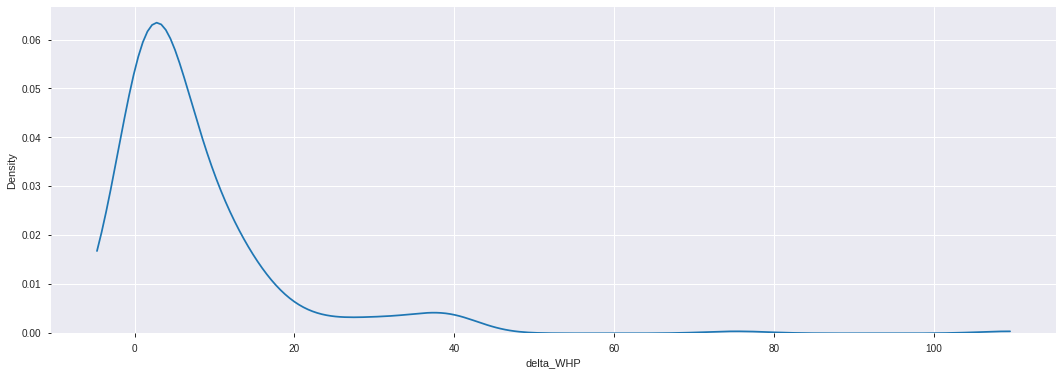

In [63]:
# Distribución de variable delta_WHP en instancias con valor nulo en la varioable FLUIDO
plt.figure(figsize=(18, 6))
sns.kdeplot(data=df[df.FLUIDO.isnull()], x="delta_WHP",cut = 0,palette='Set1')

**Estas instancias tienen una distribución de la variable delta_WHP diferente que el resto**

<a id="33"></a>
### 3.3. Variable delta_WHP

In [60]:
print("Cantidad de ceros en variable delta_WHP: ",(df["delta_WHP"] == 0).sum())

Cantidad de ceros en variable delta_WHP:  23053


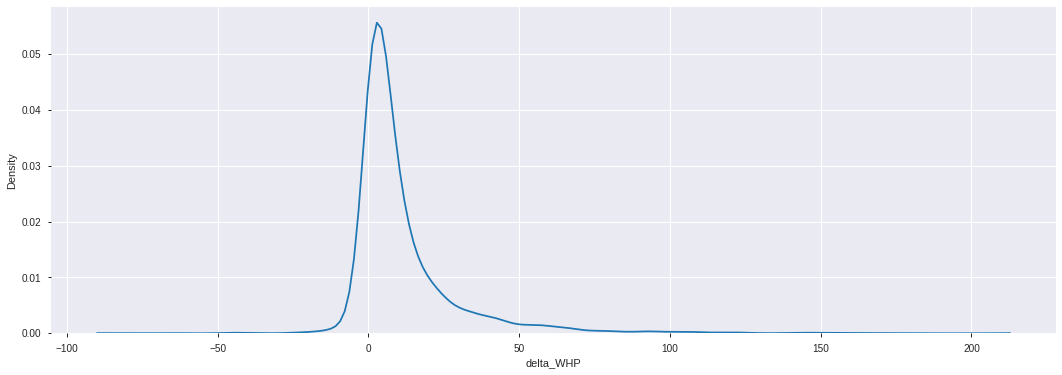

In [29]:
# Distribución de variable delta_WHP sin tomar en cuenta cuando vale cero. Esto se hace para tener mejor apreciacion de la distribución
plt.figure(figsize=(18, 6))
sns.kdeplot(data=df[df.delta_WHP != 0], x="delta_WHP",cut = 0,palette='Set1')

<a id="34"></a>
### 3.4. Variable WHP_i

In [61]:
print("Cantidad de ceros en variable WHP_i: ",(df["WHP_i"] == 0).sum())

Cantidad de ceros en variable WHP_i:  182


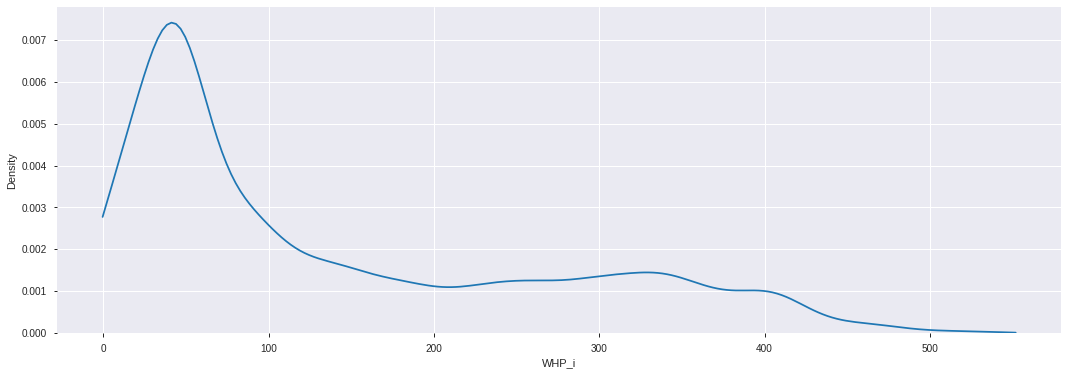

In [62]:
# Distribución de variable delta_WHP sin tomar en cuenta cuando vale cero. Esto se hace para tener mejor apreciacion de la distribución
plt.figure(figsize=(18, 6))
sns.kdeplot(data=df, x="WHP_i",cut = 0,palette='Set1')

In [50]:
# Producción de FLUIDO en función del CAMPO
px.histogram(df[df.FLUIDO.notnull()], x='CAMPO', color="FLUIDO")

[Text(0.5, 1.0, 'Correlation Matrix')]

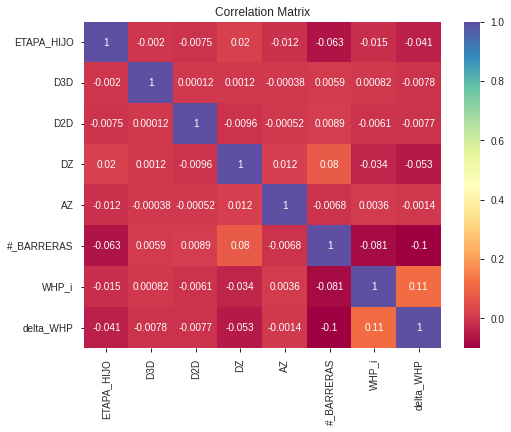

In [30]:
#Correlacion de los datos
corr = df.corr() 
plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")